# <img src="https://img.icons8.com/bubbles/100/000000/3d-glasses.png" style="height:50px;display:inline"> EE 046746 - Technion - Computer Vision


## Homework 2 - Deep Neural Networks, Classifiers & Features
---

### <a style='color:red'> Due Date: 20.05.2021 </a>

### <img src="https://img.icons8.com/bubbles/50/000000/upload-to-cloud.png" style="height:50px;display:inline"> Submission Guidelines
---
#### READ THIS CAREFULLY
* Submission only in **pairs**.
* **No handwritten submissions**.
* You can choose your working environment:
    * You can work in a `Jupyter Notebook`, locally with <a href="https://www.anaconda.com/distribution/">Anaconda</a> or online on <a href="https://colab.research.google.com/">Google Colab</a>
        * **Important**: Colab also supports running code on GPU, so if you don't have one, Colab is the way to go. To enable GPU on Colab, in the menu: `Runtime`$\rightarrow$ `Change Runtime Type` $\rightarrow$`GPU`.
    * You can work in a Python IDE such as <a href="https://www.jetbrains.com/pycharm/">PyCharm</a> or <a href="https://code.visualstudio.com/">Visual Studio Code</a>.
        * Both also allow opening/editing Jupyter Notebooks.
* You should submit two **separated** files:
    * A compressed `.zip` file, with the name: `ee046746_hw2_id1_id2.zip` which contains:
        * A folder named `code` with all the code files inside (`.py` or `.ipynb` ONLY!), and all the files required for the code to run (your own images/videos).
            * **The code should run both on CPU and GPU without manual modifications**, require no special preparation and run on every computer.
    * A report file (visualizations, discussing the results and answering the questions) in a `.pdf` format, with the name `ee046746_hw2_id1_id2.pdf`.
    * **DON'T** submit the SVHN dataset in your submission, we have a local copy of it.
    * **DON'T** submit the trained networks, but make sure to document every result you get.
        * Be precise, we expect on point answers.
        * No other file-types (`.docx`, `.html`, ...) will be accepted.
* Submission on the course website (Moodle).

### <img src="https://img.icons8.com/dusk/64/000000/python.png" style="height:50px;display:inline"> Python Libraries
---

* `numpy`
* `matplotlib`
* `pytorch` (and `torchvision`)
* `opencv` (or `scikit-image`)
* `scikit-learn`
* Anything else you need (`PIL`, `os`, `pandas`, `csv`, `json`,...)

### <img src="https://img.icons8.com/bubbles/50/000000/checklist.png" style="height:50px;display:inline"> Tasks
---
* In all tasks, you should document your process and results in a report file (which will be saved as `.pdf`). 
* You can reference your code in the report file, but no need for actual code in this file, the code is submitted in a seprate folder as explained above.

#### Part 1 - Design and Build a CNN Classifier
---
In this part you are going to design a deep convolutional neural network to classify house number digits from the **The Street View House Numbers (SVHN)** Dataset. 

SVHN is a real-world image dataset for developing machine learning and object recognition algorithms with minimal requirement on data preprocessing and formatting. It can be seen as similar in flavor to MNIST (e.g., the images are of small cropped digits), but incorporates an order of magnitude more labeled data (over 600,000 digit images) and comes from a significantly harder, unsolved, real world problem (recognizing digits and numbers in natural scene images). SVHN is obtained from house numbers in Google Street View images.

* 10 classes, 1 for each digit. Digit '0' has label 0, '1' has label 1,...
* 73257 digits for training, 26032 digits for testing, and 531131 additional, somewhat less difficult samples, to use as extra training data.

<img src="http://ufldl.stanford.edu/housenumbers/32x32eg.png" style="height:250px">

1. Load the SVHN dataset with PyTorch using `torchvision.datasets.SVHN(root, split='train', transform=None, target_transform=None, download=True)` (<a href="https://pytorch.org/docs/stable/torchvision/datasets.html#svhn"> read more here</a>). Display 5 images from the train set.
2. Use the CNN from tutorials 3-4 (`CifarCnn()`) and train it on the SVHN dataset (**keep the architecture the same**) for the same number of **epochs** with the same learning rate (try to keep the batch size the same, but if you get memory errors, you can reduce it). What is the accuracy on the test set? What classes are most confusing for this model?
    * Your test accuracy from this section will be your **baseline** accuracy for sections 3-4.
3. Design a Convolutional Neural Network (CNN) to classify digits from the images. You can modify the network from section 2, but **you must get a better result than your baseline accuracy from section 2**.
    * Describe the chosen architecture, how many layers? What activations did you choose? What are the filter sizes? Did you use fully-connected layers (if you did, explain their sizes)?
    * What is the input dimension? What is the output dimension?
    * Calculate the number of parameters (weights) in the network.
4. Train the classifier (preferably on a **GPU - use Colab for this part** if you don't have a GPU).
    * Describe the the hyper-parameters of the model (batch size, epochs, learning rate....). How did you tune your model? Did you use a validation set to tune the model? (<a href="https://gist.github.com/MattKleinsmith/5226a94bad5dd12ed0b871aed98cb123">Separating to train/validation/test in PyTorch</a>)
    * What is the final accuracy on the test set?

#### Part 2 - Analyzing a Pre-trained CNN
---
In this part you are going to analyze a (large) pre-trained model. Pre-trained models are quite popular these days, as big companies can train really large models on large datasets (something that personal users can't do as they lack the sufficient hardware). These pre-trained models can be used to fine-tune on other/small datasets or used as components in other tasks (like using a pre-trained classifier for object detection).

All pre-trained models expect input images normalized in the same way, i.e. mini-batches of 3-channel RGB images of shape (3 x H x W), where H and W are expected to be at least 224. The images have to be loaded in to a range of `[0, 1]` and then normalized using `mean = [0.485, 0.456, 0.406]` and `std = [0.229, 0.224, 0.225]`. 

You can use the following transform to normalize:

`normalize = transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])`

<a href="https://pytorch.org/vision/stable/models.html">Read more here</a>

1. Load a pre-trained VGG16 with PyTorch using `torchvision.models.vgg16(pretrained=True, progress=True, **kwargs)` (<a href="https://pytorch.org/vision/stable/models.html#classification">read more here</a>). Don't forget to use the model in evaluation mode (`model.eval()`). 
2. Load the images in the `./birds` folder and display them.
3. Pre-process the images to fit VGG16's architecture. What steps did you take?
4. Feed the images (forward pass) to the model. What are the outputs?
5. Find an image of a bird/cat/dog on the internet, display it and feed it to network. What are the outputs?
6. Apply the following 3 transformations to create 3 *new* images from the image from step 5, and display them (`opencv` has functions for all):
    * One **geometric transformation** (rotation, scaling, translation, warping...).
    * One **color transformation** (thresholding, different color space, hue, saturation, brightness, contrast...).
    * One **filter** (any filter you want).
7. Feed the transformed images to network, what is the output? is it different than section 5?
8. For the first 3 filters in the *first layer* of VGG16, plot the filters, and then plot their response (their output) for the image from section 5 and the 3 images from section 6 (total of 4 input images). Explain what do you see.
    * Consult `ee046746_appndx_visualizing_cnn_filters.ipynb` to refresh your memory.
9. For each image in the `./dogs` and `./cats` folders, extract and save their feature vectors (create a numpy array or a torch tensor that contains the features for all samples) from a fully-connected layer (such as `FC7`) of the VGG16 model. Which layer did you pick? What is the size of the feature space?
    * You need to write a function that does the feed forward manually until the desired layer. See the example in `ee046746_appndx_visualizing_cnn_filters.ipynb`. 
10. Build a Support Vector Machine (SVM) classifier (hint: `sklearn.svm.LinearSVC`) to classify cats and dogs based on the features you extracted. Use the 20 images as train set, and choose 4 images (2 dogs, 2 cats) from the internet as test sets. You can choose a different classifer than SVM from the `scikit-learn` library, no need to explain how it works (but report the name of the algorithm you used). What are the results?

## <img src="https://img.icons8.com/bubbles/50/000000/information.png" style="height:50px;display:inline"> Answers - Q2


In [34]:
#imports for our work

import numpy as np
import matplotlib.pyplot as plt
import cv2
from PIL import Image

import torch
import torch.nn as nn
import torchvision

# import datasets in torchvision
import torchvision.datasets as datasets

# import model zoo in torchvision
import torchvision.models as models
import torchvision.transforms as transforms
from torchvision import utils

from os import listdir
from os.path import isfile, join

In [48]:
# %% Global parameters

from google.colab import drive
drive.mount('/content/drive')

root_path = "drive/MyDrive/data/"
birds_path = root_path + "birds/"

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

vgg16_minimum_image_size_in_pixels = (224,224)
vgg16_mean = [0.485, 0.456, 0.406]
vgg16_std = [0.229, 0.224, 0.225]

Mounted at /content/drive


### Q2 - section 1

In [36]:
# %% 2.1


model = models.vgg16(pretrained=True, progress=True).to(device)
model.eval()

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

### Q2 - section 2

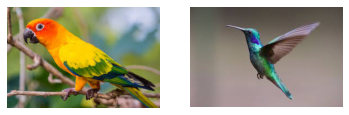

In [44]:
# 2.2
birds_files = [f for f in listdir(birds_path) if isfile(join(birds_path, f))]

fig = plt.figure()
i = 0
birds_images = []
for file in birds_files:
  #image_bgr = cv2.imread(join(birds_path, file))
  #birds_images.append(cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB) / 255)
  birds_images.append(Image.open(join(birds_path, file)))
  ax = fig.add_subplot(1, len(birds_files),i+1)
  ax.imshow(birds_images[i])
  ax.set_axis_off()
  i +=1

### Q2 - section 3

We have resized the images to the needed size for the CNN. We normailized the images according to the mean and std of the dataset the network was trained on.

In [40]:
# 2.3
normalize = transforms.Normalize(mean=vgg16_mean, std=vgg16_std)
preprocess = transforms.Compose([
  transforms.Resize(vgg16_minimum_image_size_in_pixels),
  transforms.ToTensor(),
  normalize
  ])

preprocessed_birds_images = []
for bird_image in birds_images:
  preprocessed_birds_images.append(preprocess(bird_image).unsqueeze(0).to(device)) 



### Q2 - section 4
VGG16 was trained on ImageNet data. according to classes names mapping from the index, it seems that the VGG16 model classified the bird images correctly:  
 ...  
 <b>90: 'lorikeet',</b>  
 91: 'coucal',  
 92: 'bee eater',  
 93: 'hornbill',  
 <b>94: 'hummingbird',</b>  
 ...  
 ...

In [49]:
# 2.4
for preprocessed_bird_image in preprocessed_birds_images:
  _, index = model(preprocessed_bird_image).data[0].max(0)
  print(f"predicted class: {index}")

predicted class: 90
predicted class: 94


## <img src="https://img.icons8.com/dusk/64/000000/prize.png" style="height:50px;display:inline"> Credits
* Icons from <a href="https://icons8.com/">Icon8.com</a> - https://icons8.com